# Model creation and training

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import joblib

In [2]:
data=pd.read_csv('archive/train_norm.csv',index_col=0)
#data=pd.read_csv('archive/train_cleaned.csv',index_col=0)

In [3]:
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,0.0,0,0,0.052632,0.006533,1,1,0.495849,0.671148,55.0
1,0.5,0,0,0.052632,0.006406,1,1,0.489136,0.667939,51.0
2,0.0,0,0,0.052632,0.004685,1,1,0.493996,0.671263,43.0
3,0.0,0,1,0.052632,0.004668,1,1,0.647126,0.670295,62.5
4,0.5,1,0,0.052632,0.005016,0,1,0.588728,0.707792,60.5


In [4]:
y=data['TARGET(PRICE_IN_LACS)']
X=data.drop(['TARGET(PRICE_IN_LACS)'],axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
score_dict={}
def score_dict_add(score_dict,model,mse,mae,r2,y_pred):
    score_dict[model]={"R2 Score":r2,
                       "Mean Squared Error": mse,
                       "Mean Absolute Error": mae,
                       "y_pred":y_pred}
    return score_dict

## Random Forest Regressor

In [7]:
# Creating the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
rf_regressor.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluating the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

score_dict=score_dict_add(score_dict,"Random Forest Regression",mse,mae,r2,y_pred)

## XGB Regressor

In [8]:
# Creating the XGBoost regressor
xgb_regressor = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Training the model
xgb_regressor.fit(X_train, y_train)

# Making predictions on the test set
y_pred = xgb_regressor.predict(X_test)

# Evaluating the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

score_dict=score_dict_add(score_dict,"XGBoost Regression",mse,mae,r2,y_pred)


## Support Vector Regression

In [9]:
# Creating the SVR model
svr_regressor = SVR()

# Training the model
svr_regressor.fit(X_train, y_train)

# Making predictions on the test set
y_pred = svr_regressor.predict(X_test)

# Evaluating the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

score_dict=score_dict_add(score_dict,"Support Vector Regression",mse,mae,r2,y_pred)

## Linear Regression

In [10]:
# Creating the Linear Regression model
linear_regressor = LinearRegression()

# Training the model
linear_regressor.fit(X_train, y_train)

# Making predictions on the test set
y_pred = linear_regressor.predict(X_test)

# Evaluating the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

score_dict=score_dict_add(score_dict,"Linear Regression",mse,mae,r2,y_pred)

## Ridge Regression

In [11]:
# Creating the Ridge Regression model
ridge_regressor = Ridge(alpha=0.5)

# Training the model
ridge_regressor.fit(X_train, y_train)

# Making predictions on the test set
y_pred = ridge_regressor.predict(X_test)

# Evaluating the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

score_dict=score_dict_add(score_dict,"Ridge Regression",mse,mae,r2,y_pred)

## KNN regressor

In [12]:
# Creating the KNN regressor
k = 5  # Number of neighbors to consider
knn_regressor = KNeighborsRegressor(n_neighbors=k)

# Training the model
knn_regressor.fit(X_train, y_train)

# Making predictions on the test set
y_pred = knn_regressor.predict(X_test)

# Evaluating the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

score_dict=score_dict_add(score_dict,"KNN Regression",mse,mae,r2,y_pred)

# Auto ML - Hyperparameter tuning

## Random Forest Regressor

In [ ]:
# Create the RandomForestRegressor model
rf_regressor = RandomForestRegressor(random_state=42)

# Define the hyperparameters and their ranges to tune
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
    'max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(rf_regressor, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)  # X and y are your training data and labels

In [ ]:
# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train the model with the best hyperparameters
best_model.fit(X_train, y_train)  # X and y are your training data and labels

# Save the best model to a file
joblib.dump(best_model, 'models/RFR.pkl')

## MLP Regressor

In [ ]:
# Create the MLPRegressor model
model = MLPRegressor(random_state=42)

param_grid = {
    'hidden_layer_sizes': [(np.random.randint(64, 100),), 
                           (np.random.randint(64, 100),np.random.randint(64, 100)), 
                           (np.random.randint(64, 100),np.random.randint(64, 100),np.random.randint(64, 100))],
    'learning_rate':['constant', 'adaptive'],
    'max_iter': [1000],
    'batch_size': [512]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

In [17]:
# Get the best hyperparameters and model
best_params_nn = grid_search.best_params_
best_model_nn = grid_search.best_estimator_

# Train the model with the best hyperparameters
best_model_nn.fit(X_train, y_train)  # X and y are your training data and labels

# Save the best model to a file
joblib.dump(best_model_nn, 'models/NN.pkl')

['models/NN.pkl']

## Make Prediction

In [13]:
# Make predictions on the test data
RFR = joblib.load('models/RFR.pkl')
y_pred = RFR.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

score_dict=score_dict_add(score_dict,"RFR_hyperparam",mse,mae,r2,y_pred)

In [18]:
# Make predictions on the test data
NN = joblib.load('models/NN.pkl')
y_pred = NN.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

score_dict=score_dict_add(score_dict,"MLPRegressor",mse,mae,r2,y_pred)

# Results

In [19]:
score_pd=pd.DataFrame(score_dict).transpose().sort_values('Mean Absolute Error')
score_pd.to_csv('results.csv')

In [21]:
score_pd.iloc[:,0:3]

,R2 Score,Mean Squared Error,Mean Absolute Error
Random Forest Regression,0.949042,17868.455451,30.421287
RFR_hyperparam,0.950599,17322.485174,30.767437
XGBoost Regression,0.949915,17562.361601,32.639315
KNN Regression,0.916883,29144.908936,39.314861
MLPRegressor,0.907326,32496.138356,61.766929
Linear Regression,0.751762,87044.186462,77.9829
Ridge Regression,0.750093,87629.463966,78.478471
Support Vector Regression,-0.004686,352291.899573,95.552694


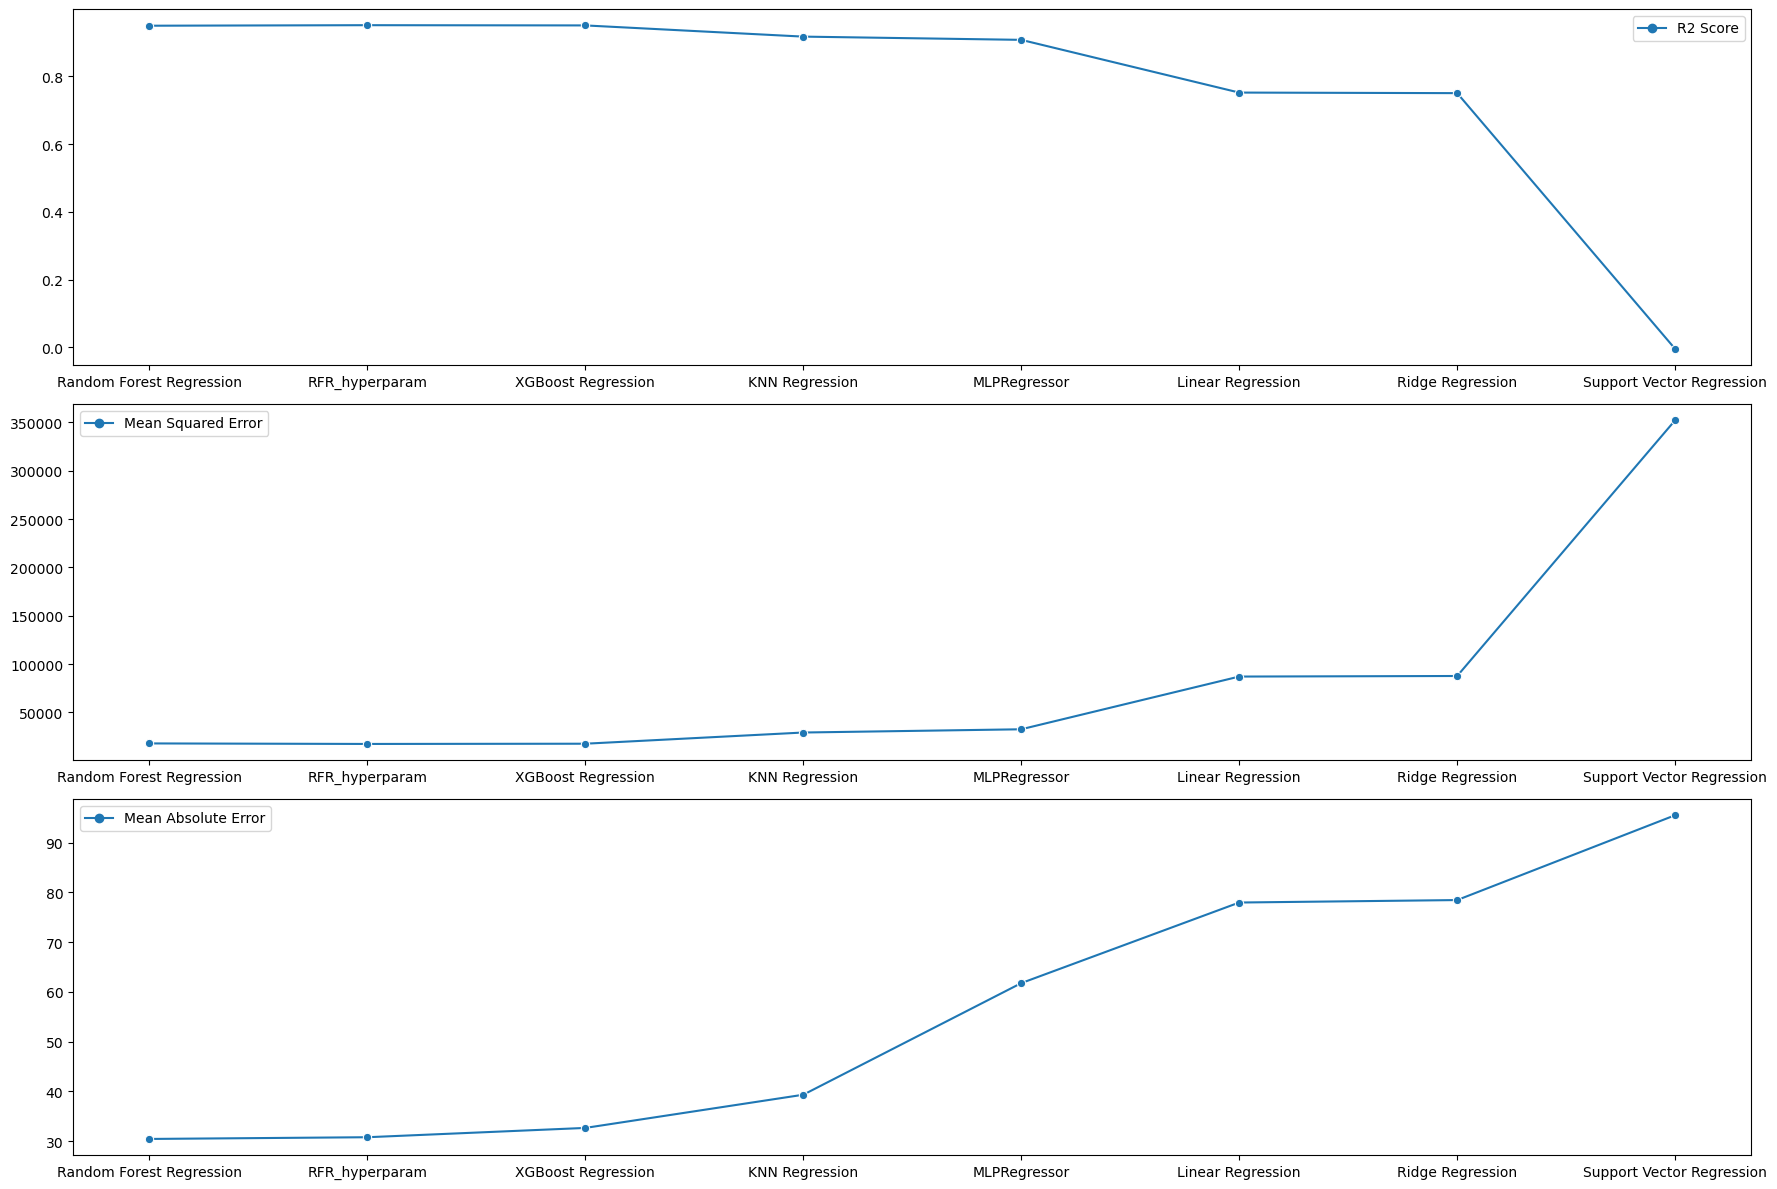

In [20]:
import seaborn as sns 
from matplotlib import pyplot as plt

fig,ax=plt.subplots(3,1,figsize=(18,12))
sns.lineplot(data=score_pd.iloc[:,[0]],markers=True,ax=ax[0])
sns.lineplot(data=score_pd.iloc[:,[2]],markers=True,ax=ax[2])
sns.lineplot(data=score_pd.iloc[:,[1]],markers=True,ax=ax[1])
plt.tight_layout()
plt.show()

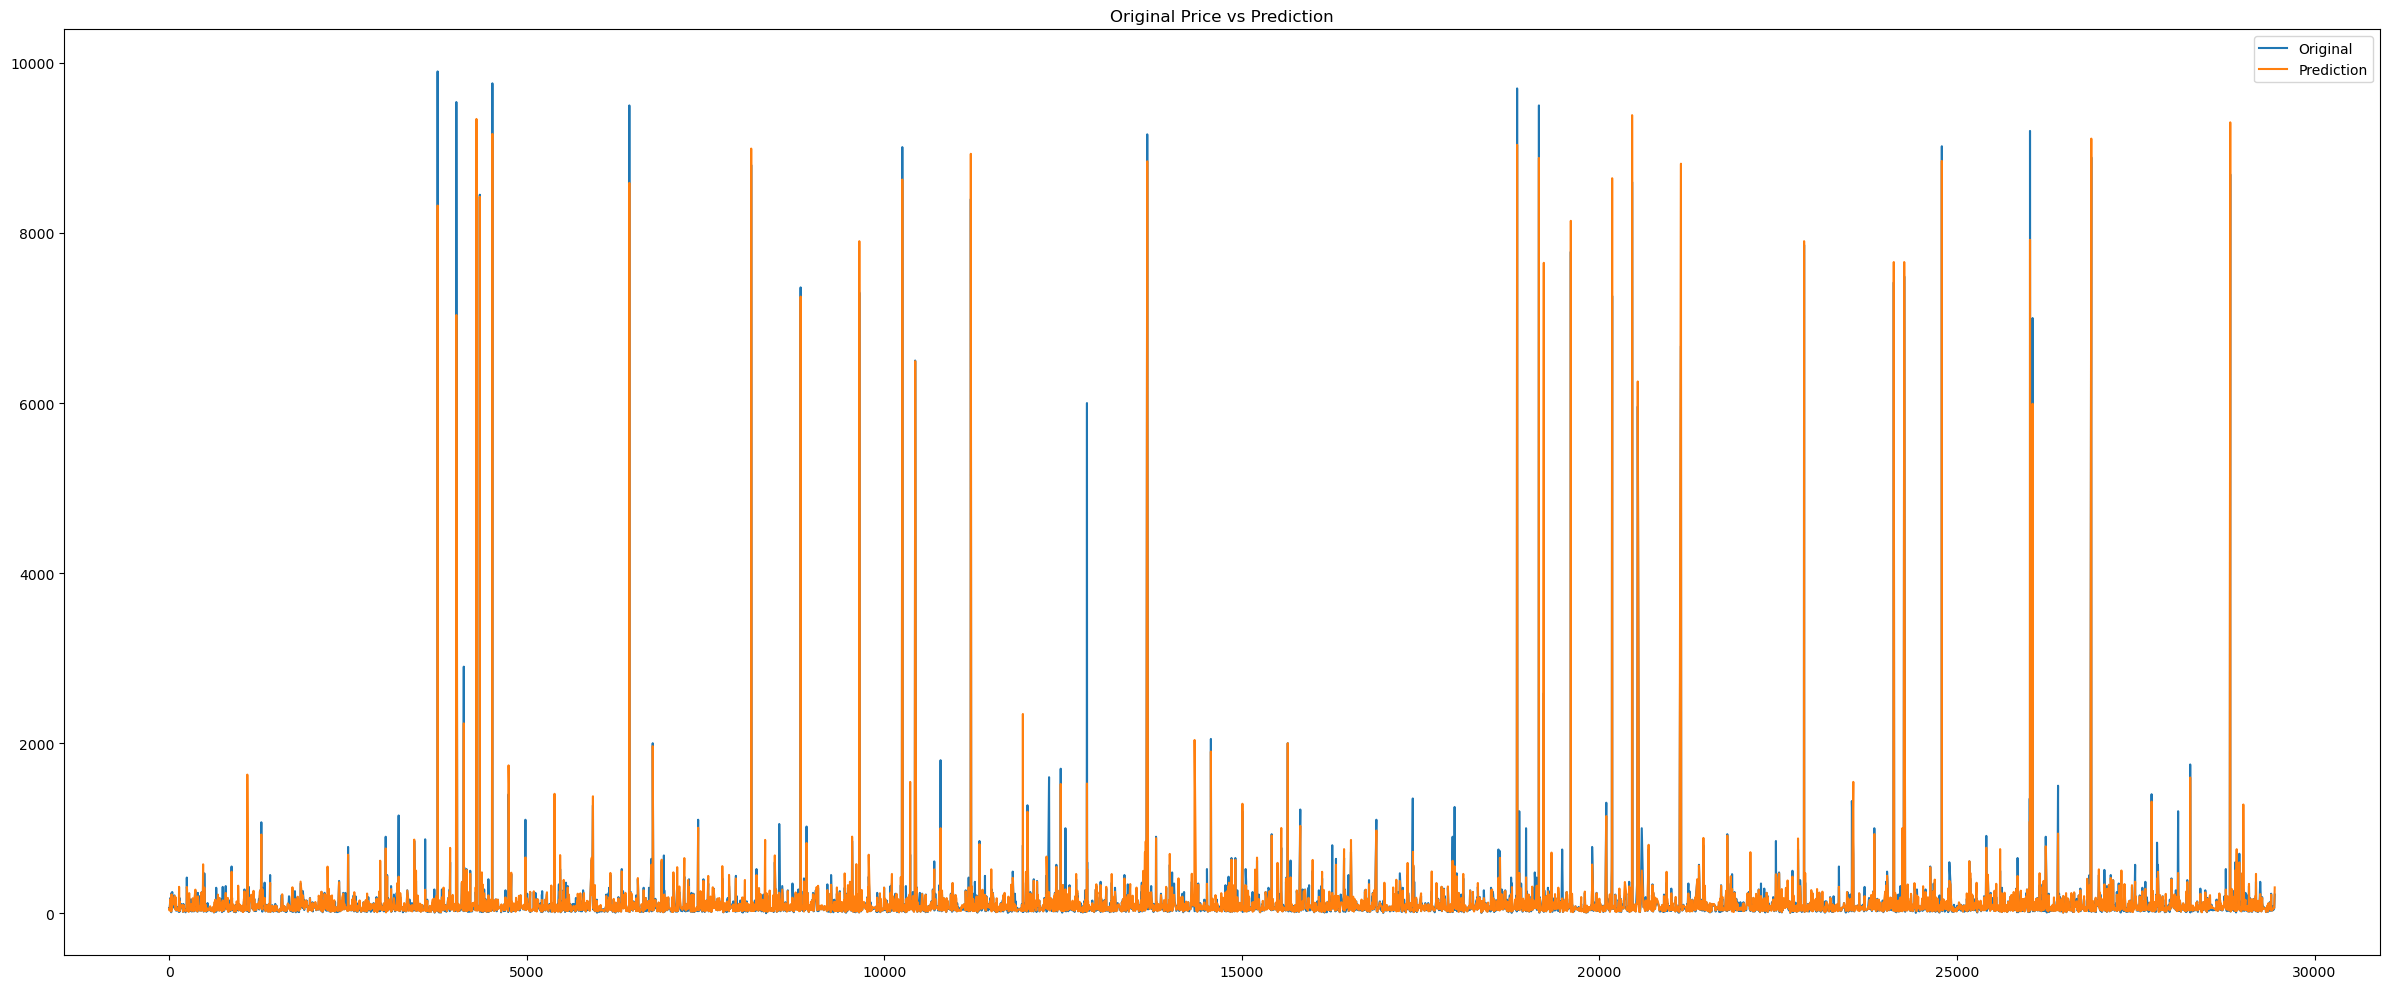

In [22]:
y_pred=score_dict['Random Forest Regression']['y_pred']

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(24, 10))

# Plot the original prices and predictions
sns.lineplot(y=y_test.values.ravel(), x=y_test.index, legend=False, ax=ax)
sns.lineplot(y=y_pred, x=y_test.index, legend=False, ax=ax)

# Set the title and legend
ax.set_title('Original Price vs Prediction')
ax.legend(['Original', 'Prediction'])

# Display the plot
plt.tight_layout()
plt.show()


In [23]:
test_data=pd.read_csv('archive/test_norm.csv',index_col=0)

In [24]:
test_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
0,0.0,0,0,0.000000,0.002793,1,1,0.575888,0.655832
1,0.5,1,1,0.052632,0.004100,0,0,0.553727,0.656171
2,0.5,0,0,0.052632,0.006446,1,1,0.588728,0.707792
3,0.5,0,0,0.105263,0.007181,1,1,0.631161,0.664371
4,0.0,0,0,0.000000,0.002204,1,1,0.589768,0.655234


In [31]:
y_pred_RFR = RFR.predict(test_data)
y_pred_NN = NN.predict(test_data)

In [33]:
mse = mean_squared_error(y_pred_RFR, y_pred_NN)
mae = mean_absolute_error(y_pred_RFR, y_pred_NN)
r2 = r2_score(y_pred_RFR, y_pred_NN)

print('Mean Squared Error: '+str(mse))
print('Mean Absolute Error: '+str(mae))
print('R2 Score: '+str(r2))

Mean Squared Error: 15221.89738933274
Mean Absolute Error: 51.010337158497826
R2 Score: 0.9492485220062491
